# Logistic Regression exercise

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [2]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]

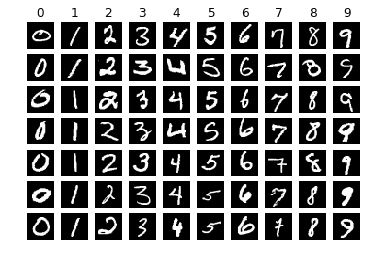

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(10)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Binary classification
We use the Logistic Regression to classification handwritten digits wheather it's zero or not. If the handwritten digits is '0' , then the label is 0, otherwise, the label is 1.

In [4]:
labels.shape

(42000,)

In [5]:
imgs.shape

(42000, 784)

In [6]:
# transform the labels to binary
for i in range(len(labels)):
    if labels[i] != 0:
        labels[i] = 1
        
# 2/3 training set
# 1/3 test set
split_index = (int) (len(labels) * 2 / 3)
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print(X_train.shape)
print(X_test.shape)

(28000, 785)
(14000, 785)


In [7]:
X_train_feats = None # choose and extract features
X_test_feats = None # choose and extract features

# 标准化，经过处理的数据符合标准正态分布
X_train_feats = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_feats = (X_test - np.mean(X_test)) / np.std(X_test)

In [8]:
X_train_feats

array([[-0.42419887, -0.42419887, -0.42419887, ..., -0.42419887,
        -0.42419887, -0.41147529],
       [-0.42419887, -0.42419887, -0.42419887, ..., -0.42419887,
        -0.42419887, -0.41147529],
       [-0.42419887, -0.42419887, -0.42419887, ..., -0.42419887,
        -0.42419887, -0.41147529],
       ...,
       [-0.42419887, -0.42419887, -0.42419887, ..., -0.42419887,
        -0.42419887, -0.41147529],
       [-0.42419887, -0.42419887, -0.42419887, ..., -0.42419887,
        -0.42419887, -0.41147529],
       [-0.42419887, -0.42419887, -0.42419887, ..., -0.42419887,
        -0.42419887, -0.41147529]])

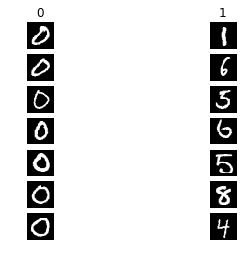

In [9]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(2)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

### 逻辑回归 $\cdot$

### sigmoid函数：$\sigma (x) = \frac{1}{1 + e^{-x}}$

结合sigmoid函数，线性回归函数，把线性回归模型的输出作为sigmoid函数的输入,得到逻辑回归模型：

### $y = \sigma (f(x)) = \sigma(\theta^{T} x) = \frac{1}{1 + e^{-\theta^{T} x}}$    

$(\theta$: 输入的一组权值  $y$: 当前标签为1或者0的概率)

把单个样本看为一个事件，那么当前事件发生的概率为：

### $P(y|x) = \begin{cases} p,y = 1,\\ 1 - p,y = 0 \end{cases}$ 

化简一下这个函数，可等价为: 对于我们采集到的这个样本$(x_i,y_i)$来说，它的标签是$y_i$的概率是:

### $P(y_i|x_i) = p^{y_i} (1 - p)^{1 - y_i}$

(当y=1时，结果是$p$;当y=0时，结果是$1-p$)

而现在我们采集到了一组数据，假设一共N个， {${(x_1,y_1),(x_2,y_2),(x_3,y_3)...(x_N,y_N)}$},

那么这种**组合在一起的事件**发生的**总概率**就是将每一个样本发生的概率**相乘**就可以了，即:

### $P_{sum} = P(y_1|x_1) \cdot P(y_2|x_2) \cdot P(y_3|x_3) ... \cdot P(y_N|x_N) = \prod_{i=1}^{N}{p^{y_i}(1-p)^{1-y_i}}$

由于连成很复杂，我们可以通过两边同时取对数把连成变成连加的形式：

### $F(\theta) = ln(P_{sum}) = ln(\prod_{i=1}^{N}{p^{y_i}(1-p)^{1-y_i}})  = \sum_{i = 1}^{N} ln(p^{y_i}(1-p)^{1-y_i}) = \sum_{i = 1}^{N}{(ln P^{y_i} + ln(1-p)^{1-y_i})}$

### $= \sum_{i = 1}^{N}{(y_i ln(p) + (1-y_i)ln(1-p)}) $,

### 其中 $，p = \frac{1}{1 + e^{-\theta^{T} x}}$

这个函数$F(\theta)$就是它的损失函数，这里的损失函数等同于整个事件发生的总概率，当然希望它越大越好了。不过需要再加个符号才符合损失的含义。问题就转换成了找到一个$\theta$,使得我们得总时间发生的概率最大

```python
#  计算loss,
# 这里的w就相当于我们的theta,计算我们sigmoid函数的参数值
n = X_batch.dot(self.w)  # 计算 参数 𝜃 ⋅ 𝑥   ,self.w.shape ->  (D,)
p = self.sigmoid(n)  # 计算sigmoid函数
m = X_batch.shape[0]  # n求出样本的数量m
loss = -(y_batch.T.dot(np.log(p)) + (1.0 - y_batch.T).dot(np.log(1.0 - p))) / m
```

### 求$F(\theta)$的梯度$\bigtriangledown F(\theta)$

### $p' = f'{(\theta)} = (\frac{1}{1 + e^{-\theta^{T}x}})'= -\frac{1}{(1+e^{-\theta^{T}x})^2} \cdot (1 + e^{-\theta^{T}x})'$
### $= -\frac{1}{(1+e^{-\theta^{T}x})^2} \cdot e^{-\theta^{T}x} \cdot (-\theta^{T}x)'= -\frac{1}{(1+e^{-\theta^{T}x})^2} \cdot e^{-\theta^{T}x} \cdot (-x)$
### $= \frac{e^{-\theta^{T}x}}{(1+e^{-\theta^{T}x})^2} \cdot x= \frac{1}{(1+e^{-\theta^{T}x})} \cdot \frac{e^{-\theta^{T}x}}{(1+e^{-\theta^{T}x})} \cdot x$
### $=p(1-p)x$

$\begin{array}{l}{\bigtriangledown F(\theta) =\nabla\left(\sum_{i=1}^{N}\left(y_{i} \ln (p)+\left(1-y_{i}\right) \ln (1-p)\right)\right)} \\ {=\sum\left(y_{i} \ln ^{\prime}(p)+\left(1-y_{i}\right) \ln ^{\prime}(1-p)\right)} \\ {=\sum\left(\left(y_{i} \frac{1}{p} p^{\prime}\right)+\left(1-y_{i}\right) \frac{1}{1-p}(1-p)^{\prime}\right)} \\ {=\sum_{}\left(y_{i}(1-p) \boldsymbol{x}_{i}-\left(1-y_{i}\right) p \boldsymbol{x}_{i}\right)} \\ {=\sum_{i=1}^{N}\left(y_{i}-p\right) \boldsymbol{x}_{i}}\end{array}$

最终我们可以得出$\bigtriangledown F(\theta) = \sum_{i=1}^{N}{(y_i - \frac{1}{1 + e^{- \theta^{T} x_i}})x_i}$

```python
# 计算loss的导数值
# gradient an array of the same shape as W
gradient = np.empty_like(self.w)  # shape  (D,)
gradient = - (X_batch.T.dot(y_batch - p) / m)  # (D,N)⋅(N,) -> (D,)
```

In [10]:
from DSVC.classifiers.logistic_regression import LogisticRegression

# Start training. 
# You should open DSVC/classifiers/logistic_regression.py and implement the function.
# Then run this cell.

classifier = LogisticRegression()
loss_history = classifier.train(
    X_train_feats, 
    y_train,
    learning_rate = 1e-3,
    num_iters = 500,
    batch_size = 64,
)

iteration 0 / 500: loss 0.690570
iteration 100 / 500: loss 0.244985
iteration 200 / 500: loss 0.147712
iteration 300 / 500: loss 0.100165
iteration 400 / 500: loss 0.071866


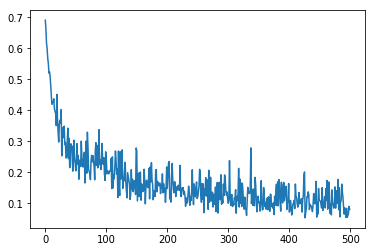

In [11]:
plt.plot(loss_history)

In [12]:
def plotScatter(X,Y):
    neg = (y == 0)
    pos = (y == 1)
    lable1 = plt.scatter(X[neg,0],X[neg,1],marker='o',c='b')
    lable2 = plt.scatter(X[pos,0],X[pos,1],marker='o',c='r')
    plt.legend((lable1,lable2),('Admitted','Not admitted'))
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')

In [13]:
y_test_pred = classifier.predict(X_test_feats)
print("The accuracy socre is {}".format(np.mean(y_test == y_test_pred)))

The accuracy socre is 0.9758571428571429


you should get the accuracy higher than 96%.

----

### F1-Measure
Notice that, if our model always output '1', totally ignoring the input X, we can get a accuracy 90%.So, in this assignment, accuracy is not efficient enough. 

We will use F1-Measure to evaluate our model.

You may need this:
[F1-Measure](https://baike.baidu.com/item/f-measure/913107?fr=aladdin)

In [14]:
y_test_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [15]:
y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

从所有的手写数字当中寻找所有结果为0的数字，我们称"结果为0"为正类，我们称"结果不为0"为负类，

|分类情况 | 相关(Relevant),正类 | 无关(NonRelevant),负类 |
|:---: | :---: | :---: |
|被检索到 | true positives (TP 正类判定为正类) | false positives (FP 负类判定为正类) |
|---|正确的判定该手写数字为"0"|分明不是"0"的手写数字却判定为数字"0"|
|未被检索到 | false negatives (FN 正类判定为负类,"去真") | true negatives (TN 负类判定为负类)|
|---|分明是"0"的手写数字却被判定为不是数字"0"|不是"0"的手写数字被判定为不是数字"0"|

- 精确率(准确率)的公式是$p = \frac{TP}{TP + FP}$,它计算的是所有"正确被检索的结果(TP)"占所有"实际被检索到的(TP+FP)"的比例.
- 召回率(recall)的公式是$R = \frac{TP}{TP+FN}$,它计算的是所有"正确被检索的结果(TP)"占所有"应该检索到的结果(TP+FN)"的比例.
- F1值就是精确值和召回率的调和均值, 也就是$\frac{2}{F_1} = \frac{1}{P} + \frac{1}{R}$,也就是$F_1 = \frac{2PR}{P+R} =  \frac{2TP}{2TP+FP+FN}$

In [16]:
print(y_test.shape[0])

14000


In [17]:
# Calculate the precision(准确率), recall(召回率) and F1
# important： We should consider label '0' as 'positive' here. 
# That means 'True positive' ==> '(y_test == 0) and (y_test_pred == 0)'

#######Your code here########
# 准确率：对于给定的测试数据集，分类器正确分类的样本数与总样本数之比. 也就是损失函数是0-1损失时测试数据集上的准确率

TP = 0.0
FP = 0.0
FN = 0.0
precision = 0.0
recall = 0.0

for i in range(y_test.shape[0]):
    if (y_test[i] == 0) and (y_test_pred[i] == 0):
        TP += 1.0
        
for i in range(y_test.shape[0]):
    if (y_test[i] != 0) and (y_test_pred[i] == 0):
        FP += 1.0
        
for i in range(y_test.shape[0]):
    if (y_test[i] == 0) and (y_test_pred[i] != 0):
        FN += 1.0
        
precision = TP / (TP + FP)
recall = TP / (TP + FN)
    
print(precision)
print(recall)
print("F1: {}".format(precision*recall*2/(precision+recall)))

0.9661164205039097
0.7880935506732814
F1: 0.868071818891491


you should get the F1 higher than 85%.

# Multiclass classification

Now, we use the Logistic Regression to classification handwritten digits. There are 10 class, from '0' to '9'.


Hint: The method "one vs all" may helpful. [Here is the introduction to "one vs all"](https://msdn.microsoft.com/library/en-us/Dn905887.aspx). 

In [18]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
        
# 2/3 training set
# 1/3 test set
split_index = (int) (len(labels) * 2 / 3)
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print(X_train.shape)
print(X_test.shape)

(28000, 785)
(14000, 785)


In [19]:
X_train_feats = None # choose and extract features
X_test_feats = None # choose and extract features
X_train_feats = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_feats = (X_test - np.mean(X_test)) / np.std(X_test)

In [20]:
# Start training. 
# You should update your code in DSVC/classifiers/logistic_regression.py .
# Then run this cell.

classifier = LogisticRegression()
classifier.one_vs_all(
    X_train_feats, 
    y_train,
    learning_rate = 1e-3,
    num_iters = 500,
    batch_size = 64,
)

iteration 0 / 500: loss 0.703070
iteration 100 / 500: loss 0.255405
iteration 200 / 500: loss 0.160904
iteration 300 / 500: loss 0.129038
iteration 400 / 500: loss 0.130230
iteration 0 / 500: loss 0.694746
iteration 100 / 500: loss 0.192641
iteration 200 / 500: loss 0.138707
iteration 300 / 500: loss 0.146890
iteration 400 / 500: loss 0.117280
iteration 0 / 500: loss 0.691653
iteration 100 / 500: loss 0.267453
iteration 200 / 500: loss 0.281776
iteration 300 / 500: loss 0.239815
iteration 400 / 500: loss 0.298330
iteration 0 / 500: loss 0.694397
iteration 100 / 500: loss 0.259504
iteration 200 / 500: loss 0.237943
iteration 300 / 500: loss 0.196918
iteration 400 / 500: loss 0.208114
iteration 0 / 500: loss 0.684454
iteration 100 / 500: loss 0.399828
iteration 200 / 500: loss 0.218483
iteration 300 / 500: loss 0.287834
iteration 400 / 500: loss 0.164049
iteration 0 / 500: loss 0.691487
iteration 100 / 500: loss 0.438704
iteration 200 / 500: loss 0.157087
iteration 300 / 500: loss 0.3021

In [21]:
y_test

array([3, 1, 3, ..., 7, 6, 9], dtype=int64)

In [22]:
y_test_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [23]:
pred = classifier.on_vs_all_predict(X_test_feats)
print(pred)

[3 1 3 ... 7 6 9]


In [24]:
# you may change your code in function `predict`
y_test_pred = classifier.on_vs_all_predict(X_test_feats)
print("The accruacy socre is: {}".format(np.mean(y_test == y_test_pred)))

The accruacy socre is: 0.8282142857142857
